# Import Packages and libraries

In [11]:
import pandas as pd
import numpy as np
import sklearn
import pycaret
import imblearn as im
from pandas.api.types import CategoricalDtype
from pycaret.classification import *
#from imblearn.over_sampling import ADASYN, BorderlineSMOTE, KMeansSMOTE, RandomOverSampler
#from imblearn.over_sampling import SMOTE,SMOTENC, SVMSMOTE
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, EditedNearestNeighbours, RepeatedEditedNearestNeighbours,AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, TomekLinks, ClusterCentroids
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git

# Reading the TAVR Data

In [12]:
data = pd.read_csv('NewRawMLTavrDataCat.csv') # reading the csv containing all the data
data.columns = data.columns.str.lower()

data.head() # printing the first five rows of the data

,id,year,key_nis,died,age,female,race,elective,aweekend,zipinc_qrtl,...,sepsis,smoker,valvular_disease,weight_loss,endovascular_tavr,transapical_tavr,ppm_placement,conversion_to_savr,vascular_complications,major_bleeding
0,1,2012,10294859,No,67,Female,White,Elective,No,ThirdQ,...,No,No,Yes,No,Yes,No,No,No,No,No
1,2,2012,10019518,No,90,Male,White,Elective,No,ThirdQ,...,No,No,Yes,No,Yes,No,No,No,No,No
2,3,2012,10155781,No,90,Male,White,NonElective,No,FourthQ,...,No,Yes,Yes,No,Yes,No,Yes,No,No,No
3,4,2012,10103697,No,80,Female,White,NonElective,No,FirstQ,...,No,Yes,Yes,No,No,Yes,Yes,No,No,No
4,5,2012,10330854,No,84,Female,White,Elective,No,FourthQ,...,No,No,Yes,No,No,Yes,No,No,No,No


In [13]:
data = data.dropna(how='any', subset=['race','zipinc_qrtl','elective'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54739 entries, 0 to 58115
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              54739 non-null  int64 
 1   year                            54739 non-null  int64 
 2   key_nis                         54739 non-null  int64 
 3   died                            54739 non-null  object
 4   age                             54739 non-null  int64 
 5   female                          54739 non-null  object
 6   race                            54739 non-null  object
 7   elective                        54739 non-null  object
 8   aweekend                        54739 non-null  object
 9   zipinc_qrtl                     54739 non-null  object
 10  hosp_region                     54739 non-null  object
 11  hosp_division                   54739 non-null  object
 12  hosp_locteach                   54739 non-null

In [15]:
#data.drop(data.columns[[0,2,11,8,15,14,34,31,33,53,16,17,19,22,24,49,50,56,57,58,59]],axis=1, inplace=True)


#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59]],axis=1, inplace=True) #All 45 All
data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34]],axis=1, inplace=True) #All 40
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40]],axis=1, inplace=True) #All 30
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40,12,43,38,47,10,29,36,25,42,44]],axis=1, inplace=True) #All 20
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40,12,43,38,47,10,29,36,25,42,44,30,18,21,27,48,45,46,26,5,51]],axis=1, inplace=True) #All 10
#data.drop(data.columns[[0,2,16,17,19,22,24,49,50,56,57,58,59,31,8,34,11,14,15,33,13,52,9,6,20,40,12,43,38,47,10,29,36,25,42,44,30,18,21,27,48,45,46,26,5,51,53,7,28,37,32]],axis=1, inplace=True) #All 5


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54739 entries, 0 to 58115
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   year                            54739 non-null  int64 
 1   died                            54739 non-null  object
 2   age                             54739 non-null  int64 
 3   female                          54739 non-null  object
 4   race                            54739 non-null  object
 5   elective                        54739 non-null  object
 6   aweekend                        54739 non-null  object
 7   zipinc_qrtl                     54739 non-null  object
 8   hosp_region                     54739 non-null  object
 9   hosp_division                   54739 non-null  object
 10  hosp_locteach                   54739 non-null  object
 11  hosp_bedsize                    54739 non-null  object
 12  h_contrl                        54739 non-null

In [16]:
# converting all columns of type object to categorical
data.loc[:, data.dtypes == 'object'] =\
    data.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

In [17]:
train = data[data['year']< 2019]
test = data[data['year']>= 2019]

In [18]:
train.drop(train.columns[[0]],axis=1, inplace=True)
#train.info()

In [19]:
test.drop(test.columns[[0]],axis=1, inplace=True)
#test.info()

# Over Sampling

## RandomOverSampler

In [20]:
ros = RandomOverSampler(sampling_strategy='minority')
ros_setup = setup(data=train,test_data= test, target = 'died', preprocess = True, imputation_type = 'iterative', categorical_imputation = 'constant',
                      handle_unknown_categorical = True, fix_imbalance=True, fix_imbalance_method=ros, fold_strategy = 'stratifiedkfold', fold = 5, n_jobs = -1,
                      session_id=2022, experiment_name='tavr_ros', log_experiment=True ,normalize = True, normalize_method ='minmax',feature_selection= True, remove_multicollinearity= True)

,Description,Value
0,session_id,2022
1,Target,died
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(40757, 46)"
5,Missing Values,1
6,Numeric Features,1
7,Categorical Features,44
8,Ordinal Features,0
9,High Cardinality Features,0


In [21]:
# adding specificity and balanced accuracy to the computed metrics
add_metric('Spec', 'Spec.', im.metrics.specificity_score)
add_metric('Balanced Accuracy', 'Balanced Accuracy', sklearn.metrics.balanced_accuracy_score)
add_metric('AUPRC_ID','AUPRC',sklearn.metrics.average_precision_score, greater_is_better = True)

Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <function balanced_accuracy_score at 0x000001E...
Scorer                            make_scorer(balanced_accuracy_score)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: Balanced_Accuracy, dtype: object

In [22]:
best_models_ros = compare_models(sort = 'Balanced Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy,TT (Sec)
ada,Ada Boost Classifier,0.7545,0.7837,0.6711,0.0674,0.1215,0.0832,0.1559,0.7565,0.7138,1.4200
ridge,Ridge Classifier,0.7604,0.0000,0.6626,0.0687,0.1233,0.0852,0.1568,0.7627,0.7127,0.1580
lr,Logistic Regression,0.7468,0.7799,0.6743,0.0659,0.1191,0.0806,0.1529,0.7485,0.7114,3.0340
gbc,Gradient Boosting Classifier,0.7791,0.7825,0.6402,0.0720,0.1282,0.0907,0.1601,0.7823,0.7113,5.5480
lda,Linear Discriminant Analysis,0.7582,0.7796,0.6594,0.0677,0.1217,0.0835,0.1543,0.7605,0.7100,0.7020
svm,SVM - Linear Kernel,0.7614,0.0000,0.6422,0.0747,0.1296,0.0924,0.1582,0.7642,0.7032,0.3400
nb,Naive Bayes,0.7783,0.7239,0.5623,0.0602,0.1082,0.0696,0.1274,0.7834,0.6728,0.1740
lightgbm,Light Gradient Boosting Machine,0.8521,0.7496,0.4620,0.0822,0.1375,0.1025,0.1467,0.8613,0.6617,0.5480
xgboost,Extreme Gradient Boosting,0.9243,0.6769,0.2230,0.0887,0.1232,0.0936,0.1052,0.9408,0.5819,5.5900
catboost,CatBoost Classifier,0.9461,0.6969,0.1771,0.1218,0.1372,0.1129,0.1173,0.9642,0.5706,10.4380


### Logistic Regression (lr)

In [23]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.5407,0.7331,0.7553,0.0370,0.0705,0.0278,0.0875,0.5357,0.6455
1,0.7264,0.8026,0.7500,0.0607,0.1123,0.0727,0.1582,0.7259,0.7379
2,0.8084,0.8068,0.6684,0.0769,0.1380,0.1010,0.1799,0.8117,0.7401
3,0.8301,0.7740,0.5936,0.0782,0.1381,0.1017,0.1694,0.8356,0.7146
4,0.8160,0.7833,0.6203,0.0751,0.1339,0.0970,0.1684,0.8206,0.7204
Mean,0.7443,0.7800,0.6775,0.0656,0.1186,0.0800,0.1527,0.7459,0.7117
SD,0.1080,0.0263,0.0659,0.0156,0.0259,0.0282,0.0333,0.1118,0.0345


In [24]:
#Tune a Model
tuned_lr = tune_model(lr,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.5486,0.7347,0.7553,0.0376,0.0716,0.0290,0.0900,0.5437,0.6495
1,0.7298,0.8057,0.7447,0.0610,0.1128,0.0733,0.1582,0.7294,0.7370
2,0.8084,0.8064,0.6684,0.0769,0.1380,0.1010,0.1799,0.8117,0.7401
3,0.8327,0.7783,0.6096,0.0811,0.1432,0.1071,0.1774,0.8379,0.7238
4,0.8143,0.7816,0.6310,0.0755,0.1349,0.0979,0.1710,0.8186,0.7248
Mean,0.7467,0.7814,0.6818,0.0664,0.1201,0.0816,0.1553,0.7482,0.7150
SD,0.1052,0.0261,0.0589,0.0159,0.0264,0.0287,0.0335,0.1088,0.0334


In [ ]:
#AUC Plot
#plot_model(tuned_lr, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_lr, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_lr, plot='feature')
# Confusion Matrix
#plot_model(tuned_lr, plot = 'confusion_matrix')

#evaluate_model(tuned_lr)

In [25]:
#Predict on test / hold-out Sample
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Logistic Regression,0.8423,0.8079,0.6193,0.0485,0.0900,0.0682,0.1410,0.8451,0.7322


In [26]:
predict_model(lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Logistic Regression,0.8427,0.8079,0.6193,0.0486,0.0902,0.0684,0.1412,0.8455,0.7324


In [ ]:
# Confusion Matrix
#plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
#plot_model(tuned_lr, plot='feature_all')

In [ ]:
#interpret_model(tuned_lr, plot = 'reason', observation = 12)

### Linear Discriminant Analysis(lda)

In [27]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.5724,0.7304,0.7287,0.0384,0.0729,0.0304,0.0900,0.5687,0.6487
1,0.7435,0.8055,0.7394,0.0637,0.1173,0.0782,0.1638,0.7436,0.7415
2,0.8200,0.8080,0.6578,0.0806,0.1436,0.1071,0.1848,0.8238,0.7408
3,0.8441,0.7769,0.5722,0.0824,0.1441,0.1083,0.1729,0.8505,0.7113
4,0.8276,0.7843,0.6257,0.0806,0.1428,0.1064,0.1792,0.8324,0.7290
Mean,0.7615,0.7810,0.6647,0.0691,0.1241,0.0861,0.1581,0.7638,0.7143
SD,0.1007,0.0280,0.0629,0.0168,0.0276,0.0301,0.0348,0.1042,0.0346


In [28]:
#Tune a Model
tuned_lda = tune_model(lda,optimize = 'Balanced Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.5662,0.7229,0.7553,0.0391,0.0743,0.0319,0.0958,0.5618,0.6585
1,0.7337,0.7970,0.7447,0.0619,0.1142,0.0748,0.1603,0.7334,0.7391
2,0.8068,0.8141,0.6578,0.0753,0.1351,0.0980,0.1750,0.8103,0.7340
3,0.8378,0.7747,0.6150,0.0842,0.1482,0.1124,0.1837,0.8430,0.7290
4,0.8060,0.7700,0.6150,0.0708,0.1270,0.0895,0.1595,0.8105,0.7127
Mean,0.7501,0.7757,0.6775,0.0663,0.1198,0.0813,0.1548,0.7518,0.7147
SD,0.0981,0.0308,0.0613,0.0154,0.0253,0.0275,0.0309,0.1016,0.0294


In [ ]:
#AUC Plot
#plot_model(tuned_lda, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_lda, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_lda, plot='feature')
# Confusion Matrix
#plot_model(tuned_lda, plot = 'confusion_matrix')

#evaluate_model(tuned_lda)

In [29]:
#Predict on test / hold-out Sample
predict_model(tuned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Linear Discriminant Analysis,0.8423,0.7958,0.5909,0.0465,0.0862,0.0644,0.1327,0.8455,0.7182


In [30]:
predict_model(lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Linear Discriminant Analysis,0.8543,0.8090,0.5909,0.0503,0.0927,0.0711,0.1408,0.8577,0.7243


In [ ]:
# Confusion Matrix
#plot_model(lda, plot = 'confusion_matrix')

In [ ]:
#plot_model(lda, plot='feature_all')

### Gradient Boosting Classifier (gbc)

In [31]:
gbc = create_model('gbc',ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated', subsample=1.0, tol=0.0001,
                           validation_fraction=0.1,warm_start=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.6148,0.7295,0.7287,0.0425,0.0803,0.0383,0.1046,0.6121,0.6704
1,0.7754,0.7808,0.6330,0.0633,0.1150,0.0763,0.1467,0.7788,0.7059
2,0.8432,0.7972,0.5989,0.0852,0.1491,0.1135,0.1823,0.8489,0.7239
3,0.8546,0.7716,0.5134,0.0807,0.1394,0.1039,0.1594,0.8626,0.6880
4,0.8608,0.7782,0.5187,0.0849,0.1460,0.1109,0.1671,0.8688,0.6938
Mean,0.7898,0.7715,0.5985,0.0713,0.1260,0.0886,0.1520,0.7942,0.6964
SD,0.0926,0.0226,0.0797,0.0165,0.0258,0.0284,0.0264,0.0966,0.0179


In [32]:
#Tune a Model
tuned_gbc = tune_model(gbc,optimize = 'Balanced Accuracy', n_iter= 100)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:34:19
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min


KeyboardInterrupt: 

In [ ]:
#AUC Plot
#plot_model(tuned_gbc, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_gbc, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_gbc, plot='feature')
# Confusion Matrix
#plot_model(tuned_gbc, plot = 'confusion_matrix')

#evaluate_model(tuned_gbc)

In [264]:
#Predict on test / hold-out Sample
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Gradient Boosting Classifier,0.8489,0.8041,0.6250,0.0510,0.0943,0.0727,0.1471,0.8517,0.7384


In [232]:
predict_model(gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Gradient Boosting Classifier,0.8215,0.7511,0.5682,0.0397,0.0742,0.0519,0.1140,0.8247,0.6964


In [ ]:
# Confusion Matrix
#plot_model(tuned_gbc, plot = 'confusion_matrix')

In [ ]:
#plot_model(tuned_gbc, plot='feature_all')

### CatBoost Classifier (catboost)

In [233]:
#catboost = create_model('catboost',class_weights={0:6, 1:9},max_depth=3)
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.6754,0.6143,0.5053,0.0359,0.0670,0.0250,0.0592,0.6794,0.5924
1,0.6854,0.6907,0.6223,0.0448,0.0836,0.0424,0.0995,0.6868,0.6546
2,0.7748,0.6490,0.5134,0.0521,0.0947,0.0553,0.1054,0.7809,0.6471
3,0.7978,0.6458,0.4706,0.0538,0.0965,0.0577,0.1032,0.8055,0.6380
4,0.8189,0.6590,0.4545,0.0583,0.1033,0.0653,0.1101,0.8275,0.6410
Mean,0.7505,0.6518,0.5132,0.0490,0.0890,0.0491,0.0955,0.7560,0.6346
SD,0.0590,0.0246,0.0587,0.0078,0.0127,0.0141,0.0185,0.0614,0.0219


In [234]:
#Tune a Model
tuned_catboost = tune_model(catboost,optimize = 'Balanced Accuracy',n_iter= 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.7244,0.6492,0.4947,0.0414,0.0764,0.0354,0.0754,0.7298,0.6122
1,0.7051,0.7459,0.6809,0.0518,0.0962,0.0558,0.1262,0.7057,0.6933
2,0.8160,0.7289,0.5722,0.0701,0.1249,0.0876,0.1511,0.8217,0.6969
3,0.8355,0.7591,0.5936,0.0807,0.1420,0.1059,0.1738,0.8412,0.7174
4,0.8319,0.7478,0.5455,0.0735,0.1296,0.0929,0.1530,0.8386,0.6921
Mean,0.7826,0.7262,0.5774,0.0635,0.1138,0.0755,0.1359,0.7874,0.6824
SD,0.0561,0.0397,0.0614,0.0146,0.0240,0.0260,0.0338,0.0578,0.0362


In [ ]:
#AUC Plot
#plot_model(tuned_catboost, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_catboost, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_catboost, plot='feature')
# Confusion Matrix
#plot_model(tuned_catboost, plot = 'confusion_matrix')

#evaluate_model(tuned_catboost)

In [235]:
#Predict on test / hold-out Sample
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,CatBoost Classifier,0.8419,0.7608,0.5568,0.0439,0.0814,0.0595,0.1225,0.8455,0.7012


In [236]:
predict_model(catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,CatBoost Classifier,0.8173,0.6947,0.5057,0.0348,0.0652,0.0426,0.0943,0.8213,0.6635


In [ ]:
# Confusion Matrix
#plot_model(catboost, plot = 'confusion_matrix')

In [ ]:
#plot_model(catboost, plot='feature_all')

### Light Gradient Boosting Machine (lightgbm)

In [237]:
lightgbm = create_model('lightgbm',class_weight={0:6, 1:9},max_depth=3,num_leaves=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.4670,0.6506,0.7287,0.0309,0.0593,0.0158,0.0571,0.4608,0.5948
1,0.5539,0.7369,0.7660,0.0385,0.0734,0.0308,0.0948,0.5488,0.6574
2,0.6040,0.7257,0.7273,0.0411,0.0777,0.0358,0.1001,0.6011,0.6642
3,0.6356,0.7609,0.7701,0.0469,0.0884,0.0472,0.1244,0.6325,0.7013
4,0.6613,0.7392,0.7273,0.0478,0.0897,0.0487,0.1215,0.6597,0.6935
Mean,0.5843,0.7227,0.7439,0.0410,0.0777,0.0357,0.0996,0.5806,0.6622
SD,0.0687,0.0378,0.0198,0.0061,0.0111,0.0120,0.0242,0.0703,0.0376


In [238]:
#Tune a Model
tuned_lightgbm = tune_model(lightgbm,optimize = 'Balanced Accuracy',n_iter= 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,0.4681,0.6451,0.7340,0.0312,0.0598,0.0163,0.0590,0.4618,0.5979
1,0.5623,0.7475,0.7713,0.0395,0.0752,0.0327,0.0992,0.5574,0.6643
2,0.6225,0.7517,0.7487,0.0442,0.0834,0.0419,0.1131,0.6195,0.6841
3,0.6149,0.7810,0.7914,0.0456,0.0862,0.0447,0.1230,0.6107,0.7011
4,0.6800,0.7603,0.7059,0.0492,0.0919,0.0512,0.1227,0.6794,0.6927
Mean,0.5896,0.7371,0.7503,0.0419,0.0793,0.0374,0.1034,0.5858,0.6680
SD,0.0713,0.0474,0.0296,0.0062,0.0111,0.0121,0.0238,0.0731,0.0371


In [ ]:
#AUC Plot
#plot_model(tuned_lightgbm, plot = 'auc')
#Precision-Recall Curve
#plot_model(tuned_lightgbm, plot = 'pr')
# Feature Importance Plot
#plot_model(tuned_lightgbm, plot='feature')
# Confusion Matrix
#plot_model(tuned_lightgbm, plot = 'confusion_matrix')

#evaluate_model(tuned_lightgbm)

In [239]:
#Predict on test / hold-out Sample
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Light Gradient Boosting Machine,0.6744,0.7772,0.7386,0.0280,0.0540,0.0305,0.0976,0.6736,0.7061


In [240]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Spec.,Balanced Accuracy
0,Light Gradient Boosting Machine,0.6744,0.7667,0.7102,0.0270,0.0521,0.0285,0.0910,0.6739,0.6921


In [ ]:
# Confusion Matrix
#plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
#plot_model(tuned_lightgbm, plot='feature_all')

# Plot

In [ ]:
X_test = get_config ('X_test')
y_test = get_config ('y_test')

In [ ]:
X_train = get_config ('X_train')
y_train = get_config ('y_train')

In [ ]:
y_test.to_csv('ytestQ2Table1.csv')
y_train.to_csv('ytrainQ2Table1.csv')

In [ ]:
X_test.to_csv('XtestQ2Table1.csv')
X_train.to_csv('XtrainQ2Table1.csv')

In [ ]:
X_test = get_config('X_test')
y_test = get_config ('y_test')

## Figure AUC

In [ ]:
model1 = tuned_lr
model2 = tuned_lightgbm
model3 = tuned_gbc
model4 = tuned_lda
model5 = tuned_catboost


In [ ]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)

In [ ]:
plt.figure(figsize=(10,6))
ax=plt.axes([0,1,1,1])
ax.set_facecolor("White")
plt.grid(False)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_alpha(0.5)
#ax.spines['left'].set_position(('data', 0))

#ax.tick_params(axis="y",direction="out", pad=-22)

ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_alpha(0.5)
#ax.spines['bottom'].set_position(('data',0))

ax.tick_params(direction='out', length=6, width=1, colors='black', grid_color='black', grid_alpha=0.5)

          
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='-',color='#810f7c', label="LR (AUC= 0.807)")
plt.plot(fpr1, tpr1, linestyle='-',color='#bd0026', label="LightGBM (AUC= 0.800)")
plt.plot(fpr2, tpr2, linestyle='-',color='#fecc5c', label="GBC (AUC= 0.802)")
plt.plot(fpr5, tpr5, linestyle='-',color='#006d2c', label="LDA (AUC= 0.804)")
plt.plot(fpr3, tpr3, linestyle='-',color='#253494', label="CatBoost (AUC= 0.799)")

# title
#plt.title('ROC curve')
# x label
#plt.xlabel('False Positive Rate',weight='bold')
plt.xlabel('False Positive Rate')
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
#plt.xticks(weight='bold')
# y label
plt.ylabel('True Positive rate')
#plt.ylabel('True Positive rate',weight='bold')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
#plt.yticks(weight='bold')


plt.legend(loc=4)
plt.savefig('Figuer1q2',dpi=400,bbox_inches='tight')
plt.savefig('Figuer1q2.tiff',dpi=400,bbox_inches='tight')
plt.savefig('Figuer1q2.tif',dpi=400,bbox_inches='tight')

plt.show()

## Figure Models Performance by Number of Variables

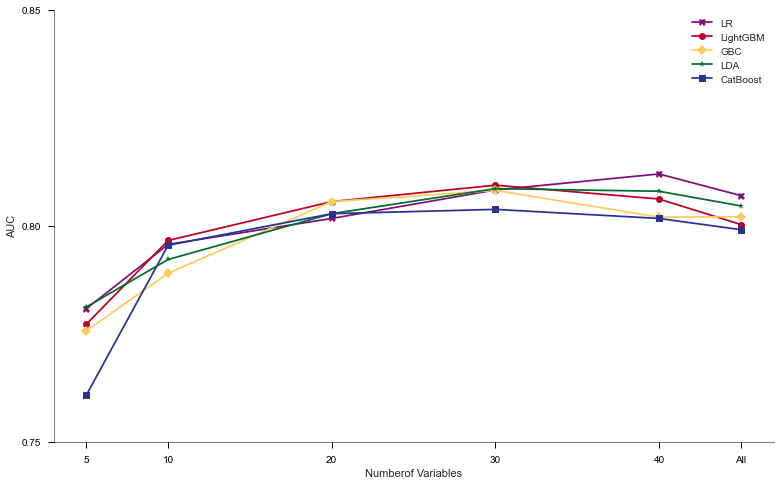

In [253]:
plt.figure(figsize=(10,6))
ax=plt.axes([0,1,1,1])
ax.set_facecolor("White")
plt.grid(False)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_alpha(0.5)
#ax.spines['left'].set_position(('data', 0))

#ax.tick_params(axis="y",direction="out", pad=-22)

ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_alpha(0.5)
#ax.spines['bottom'].set_position(('data',0))

ax.tick_params(direction='out', length=6, width=1, colors='black', grid_color='black', grid_alpha=0.1)



nov = [5,10,20,30,40,45]

LR = [0.7808,0.7957,0.8017,0.8083,0.812,0.807]
LightGBM = [0.7772,0.7966,0.8056,0.8094,0.8062,0.8003]
GBC = [0.7757,0.789,0.8056,0.8082,0.802,0.8021]
LDA = [0.7812,0.7922,0.8028,0.8086,0.808,0.8046]
CatBoost = [0.7608,0.7955,0.8028,0.8038,0.8017,0.7991]

line_chart1 = plt.plot(nov,LR, color='#810f7c',marker="X", label = 'LR')
line_chart2 = plt.plot(nov, LightGBM, color='#bd0026',marker="o", label = 'LightGBM')
line_chart3 = plt.plot(nov, GBC,color='#fecc5c',marker="D", label = 'GBC')
line_chart4 = plt.plot(nov, LDA, color='#006d2c',marker="*", label = 'LDA')
line_chart5 = plt.plot(nov,CatBoost, color='#253494',marker="s", label = 'CatBoost')


plt.xlabel('Numberof Variables')
plt.xticks([5,10,20,30,40,45])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '5'
labels[1] = '10'
labels[2] = '20'
labels[3] = '30'
labels[4] = '40'
labels[5] = 'All'

ax.set_xticklabels(labels)
#plt.xlabel('Numberof Variables',weight='bold')
#plt.xticks([5, 10,20,30,40,48],weight='bold')


plt.ylabel('AUC')
plt.yticks([0.75,0.80,0.85])
#plt.ylabel('AUC',weight='bold')
#plt.yticks([0.85, 0.90,0.95,1],weight='bold')

#plt.title('Models Performance by Number of Variables')





plt.legend(loc='best')

#plt.legend(['1-7 July 2019', '8-14 July 2019'], loc=3)
plt.savefig('Newfigure2q2',dpi=300,bbox_inches='tight')
plt.savefig('newfigure2q2.tiff',dpi=300,bbox_inches='tight')
plt.savefig('newfigure2q2.tif',dpi=300,bbox_inches='tight')

plt.show()

## Figure Ranking

In [ ]:
LightGBM ={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,4,7,3,9,5,6,11,13,8,15,12,14]}
GBC={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI",], "Rank":[1,5,3,4,7,2,9,6,8,13,10,9,14]} 
CatBoost={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,5,8,3,6,10,13,12,14,11,4,7]}
LR={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,5,8,9,7,12,10,6,15,11,13,14,16,]}
LDA={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,4,9,8,7,11,10,6,15,12,14,13,16,]}

LightGBM1 ={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
GBC1={"Feature": ["Fluid and Electrolyte"], "Rank":[1]} 
CatBoost1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LR1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LDA1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("white")

sns.stripplot(x="Feature", y="Rank",data=LightGBM1,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none',label='LightGBM')
sns.stripplot(x="Feature", y="Rank", data=GBC1, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none',label='GBC')
sns.stripplot(x="Feature", y="Rank", data=CatBoost1, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none',label='CatBoost')
sns.stripplot(x="Feature", y="Rank", data=LR1, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none',label='LR')
sns.stripplot(x="Feature", y="Rank", data=LDA1, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none',label='LDA')

sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)
plt.legend(loc=2)
plt.savefig('figure33q2',dpi=300,bbox_inches='tight')
plt.savefig('figure33q2.tiff',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:

LightGBM ={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,4,7,3,9,5,6,11,13,8,15,12,14]}
GBC={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI",], "Rank":[1,5,3,4,7,2,9,6,8,13,10,9,14]} 
CatBoost={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,5,8,3,6,10,13,12,14,11,4,7]}
LR={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,5,8,9,7,12,10,6,15,11,13,14,16,]}
LDA={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,4,9,8,7,11,10,6,15,12,14,13,16,]}

LightGBM1 ={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
GBC1={"Feature": ["Fluid and Electrolyte"], "Rank":[1]} 
CatBoost1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LR1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LDA1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("whitegrid")
#sns.stripplot(x="Feature", y="Rank",data=LightGBM,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
#sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')



#sns.stripplot(x="Feature", y="Rank",data=LightGBM1,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none',label='LightGBM')
#sns.stripplot(x="Feature", y="Rank", data=GBC1, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none',label='GBC')
#sns.stripplot(x="Feature", y="Rank", data=CatBoost1, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none',label='CatBoost')
#sns.stripplot(x="Feature", y="Rank", data=LR1, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none',label='LR')
#sns.stripplot(x="Feature", y="Rank", data=LDA1, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none',label='LDA')

ax=sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)


plt.legend(loc=2)
plt.savefig('figure3q2',dpi=300,bbox_inches='tight')
plt.savefig('figure3q2.tiff',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
LR={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,5,8,9,7,12,10,6,15,11,13,14,16,]}
LightGBM ={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,4,7,3,9,5,6,11,13,8,15,12,14]}
GBC={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI",], "Rank":[1,5,3,4,7,2,9,6,8,13,10,9,14]} 
LDA={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,4,9,8,7,11,10,6,15,12,14,13,16,]}
CatBoost={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,5,8,3,6,10,13,12,14,11,4,7]}

LR1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LightGBM1 ={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
GBC1={"Feature": ["Fluid and Electrolyte"], "Rank":[1]} 
LDA1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
CatBoost1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("white")

sns.stripplot(x="Feature", y="Rank", data=LR1, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none',label='LR')
sns.stripplot(x="Feature", y="Rank",data=LightGBM1,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none',label='LightGBM')
sns.stripplot(x="Feature", y="Rank", data=GBC1, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none',label='GBC')
sns.stripplot(x="Feature", y="Rank", data=LDA1, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none',label='LDA')
sns.stripplot(x="Feature", y="Rank", data=CatBoost1, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none',label='CatBoost')

sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')

#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)
plt.legend(loc=2)
plt.savefig('figure33q2',dpi=300,bbox_inches='tight')
plt.savefig('figure33q2.tiff',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:

LR={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,5,8,9,7,12,10,6,15,11,13,14,16,]}
LightGBM ={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,4,7,3,9,5,6,11,13,8,15,12,14]}
GBC={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Pulmonary\nCirculation","Prior PCI",], "Rank":[1,5,3,4,7,2,9,6,8,13,10,9,14]} 
LDA={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Cardiac\nArrhythmias","Smoker","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Pulmonary\nCirculation","Carotid Artery\nDisease"], "Rank":[2,1,3,4,9,8,7,11,10,6,15,12,14,13,16,]}
CatBoost={"Feature": ["Fluid and\nElectrolyte","Age","Liver\nDisease","Hypertension","Peripheral \nVascular","Dyslipidemia","Coagulopathy","Prior PPM","Chronic\nKidney Disease","Anemia","Cancer","Prior PCI","Carotid Artery\nDisease"], "Rank":[2,1,5,8,3,6,10,13,12,14,11,4,7]}

LR1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
LightGBM1 ={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
GBC1={"Feature": ["Fluid and Electrolyte"], "Rank":[1]} 
LDA1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}
CatBoost1={"Feature": ["Fluid and Electrolyte"], "Rank":[2]}

sns.set(rc = {'figure.figsize':(18,9)})
sns.set_style("whitegrid")

ax=sns.stripplot(x="Feature", y="Rank", data=LR, dodge=False,palette=['#810f7c'], marker="+",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank",data=LightGBM, dodge=False,palette=['#bd0026'], marker="x",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=GBC, dodge=False,palette=['#fecc5c'], marker="o",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=LDA, dodge=False,palette=['#006d2c'], marker="*",linewidth=1,size = 10,edgecolor='none')
ax=sns.stripplot(x="Feature", y="Rank", data=CatBoost, dodge=False,palette=['#253494'], marker="^",linewidth=1,size = 10,edgecolor='none')

#plt.xlabel(["Cardiac\nArrest","Cardiogenic\nShock","Age","Conversiont\nTo SAVR","Sepsis","Anystroke","Vascular\nComplications","AKI","Fluid And\nElectrolyte","Major\nBleeding","Peripheral\nVascular","Dyslipidemia","Prior\nStroke","Respiratory\nComplications"],weight='bold')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],weight='bold')                
plt.xlabel('Feature')
plt.ylabel('Rank')
#ax.legend(fontsize=100,loc=2)


plt.legend(loc=2)
plt.savefig('figure3q2',dpi=300,bbox_inches='tight')
plt.savefig('figure3q2.tiff',dpi=300,bbox_inches='tight')
plt.show()